Observations
1. Temperatures follow a smooth arc with the highest temperatures being closest to the equator and dropping predictably at locations further from the equator. 

2. The majority of humidity data points lie between 80-100%, although there is little to no correlation between humidity and proximity to the equator or location in general.

3. There is no significant relationship between proximity to the equator and cloudiness. The two extremes of 0% cloud cover and near 100% cloud cover make up the majority of data points, with the remaining data evenly distributed between both location and percent cloud cover.

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
api_key = 'e6896c223b1530c896ffbac8d107ceb6'

# Output File (CSV)
output_data_file = "/Users/ZGS/Documents/Data_Bootcamp/output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [49]:
# List for holding lat_lngs and cities
from collections import defaultdict
lat_lng = defaultdict()
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for x in lat_lngs:
    lat, long = x # tuple unpacking
    city = citipy.nearest_city(lat, long).city_name
    lat_lng[city] = (lat, long)

In [50]:
#Create DataFrame
df = pd.DataFrame(list(lat_lng.items()))
df.columns = ['city', 'lat_long']
df['lat'] = df.lat_long.map(lambda x: str(x[0]))
df['lon'] = df.lat_long.map(lambda x: str(x[1]))
print(df.shape)
df.head()

(620, 4)


,city,lat_long,lat,lon
0,barcelona,"(10.970074861224717, -65.06055142188151)",10.970074861224717,-65.06055142188151
1,taolanaro,"(-38.227634792576694, 53.65818276297165)",-38.227634792576694,53.65818276297165
2,albany,"(-76.50822434673898, 102.29848696719012)",-76.50822434673898,102.29848696719012
3,vaini,"(-20.445769720589, -175.06690591300958)",-20.445769720589,-175.06690591300958
4,rivadavia,"(-33.51900057472405, -68.47414844292278)",-33.51900057472405,-68.47414844292278


In [51]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
# print(url)

In [52]:
def get_current_weather(df_object):
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        'APPID': api_key,
        'lat': df_object.lat,
        'lon': df_object.lon,
        'units': 'Imperial'
    }
    data = requests.get(base_url, params=params)
    time.sleep(.50)
    return data.json()

In [69]:
sample = df.sample(n=500)
sample['weather_json'] = sample.apply(get_current_weather, axis=1)
sample['temp'] = sample.weather_json.map(lambda x: x.get('main').get('temp'))
sample['humidity'] = sample.weather_json.map(lambda x: x.get('main').get('humidity'))
sample['cloudiness'] = sample.weather_json.map(lambda x: x.get('clouds').get('all'))
sample['wind speed'] = sample.weather_json.map(lambda x: x.get('wind').get('speed'))
sample.head()

,city,lat_long,lat,lon,weather_json,temp,humidity,cloudiness,wind speed
242,bathsheba,"(22.254293558441702, -45.658419320585125)",22.254293558441702,-45.658419320585125,"{'coord': {'lon': -45.66, 'lat': 22.25}, 'weat...",76.29,100,0,6.73
448,flin flon,"(58.50456773977308, -101.35958686945862)",58.50456773977308,-101.35958686945862,"{'coord': {'lon': -101.36, 'lat': 58.5}, 'weat...",60.72,67,20,8.75
79,quatre cocos,"(-18.797853544709326, 61.593589681424675)",-18.797853544709326,61.593589681424675,"{'coord': {'lon': 61.59, 'lat': -18.8}, 'weath...",76.56,100,48,14.79
408,bafata,"(12.506574432216894, -14.74646906559326)",12.506574432216894,-14.74646906559326,"{'coord': {'lon': -14.75, 'lat': 12.51}, 'weat...",96.80,37,0,6.93
196,vestmanna,"(64.22874525168444, -8.216963637342502)",64.22874525168444,-8.216963637342502,"{'coord': {'lon': -8.22, 'lat': 64.23}, 'weath...",45.15,100,92,28.43


In [70]:
row_count = 0
for index, row in sample.iterrows():
    print("Now retieving city # " + str(row_count))
    print(url)
    row_count += 1

Now retieving city # 0
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e6896c223b1530c896ffbac8d107ceb6
Now retieving city # 1
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e6896c223b1530c896ffbac8d107ceb6
Now retieving city # 2
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e6896c223b1530c896ffbac8d107ceb6
Now retieving city # 3
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e6896c223b1530c896ffbac8d107ceb6
Now retieving city # 4
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e6896c223b1530c896ffbac8d107ceb6
Now retieving city # 5
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e6896c223b1530c896ffbac8d107ceb6
Now retieving city # 6
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e6896c223b1530c896ffbac8d107ceb6
Now retieving city # 7
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e6896c223b1530c896ffbac8d107ceb6
Now reti

In [128]:
sample.to_csv("weatherdata.csv", encoding="utf-8", index=False)

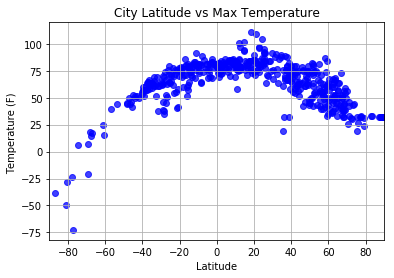

In [124]:
# Latitude vs Max Temp
plt.scatter(sample["lat"].astype(float), sample["temp"].astype(float), marker="o", color = 'blue', alpha = 0.75)
#chart labels
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

#Save the figure
plt.savefig("Lat_vs_MaxTemp.png")
plt.show()

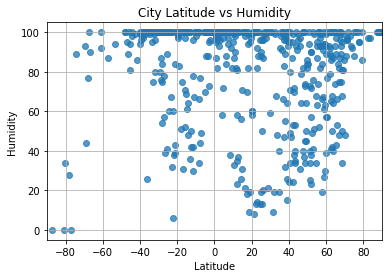

In [125]:
# Latitude vs Humidity
plt.scatter(sample["lat"].astype(float), sample["humidity"].astype(float), marker="o", alpha = 0.75)

# Add chart labels
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Humidity.png")

# Show plot
plt.show()

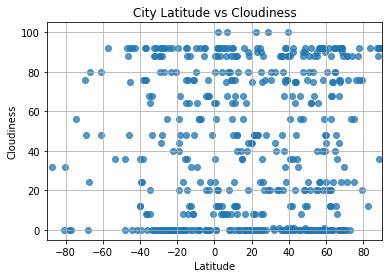

In [126]:
# Latitude vs Cloudiness
plt.scatter(sample["lat"].astype(float), sample["cloudiness"].astype(float), marker="o", alpha = 0.75)

# Add chart labels
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")

# Show plot
plt.show()

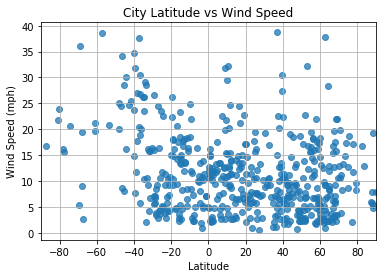

In [130]:
# Latitude vs Wind Speed
plt.scatter(sample["lat"].astype(float), sample["wind speed"].astype(float), marker="o", alpha = 0.75)

# Add chart labels
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_WindSpeed.png")

# Show plot
plt.show()

#### 

In [129]:
#sample.to_csv('sample_data.csv', index=False, header=True)